In [1]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)
# %cd /content/drive/MyDrive/Colab Notebooks/Disertasi-Ahmad-Rofiqul/002.Experiment_SWI_16052024/

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.svm import OneClassSVM

In [106]:
# Load the dataset
# file_path = '01.Dataset-Rofiqul/BeforeRemoveOutliers/013_N2O_After_HardVoting_Inliers.csv'
# file_path = '01.Dataset-Rofiqul/BeforeRemoveOutliers/014_N2O_After_SoftVoting_Inliers.csv'
file_path = '01.Dataset-Rofiqul/BeforeRemoveOutliers/011_N2O_Soft_Voting_agriculture_dataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset for review
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2246 entries, 0 to 2245
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 2246 non-null   object 
 1   Year                 2246 non-null   float64
 2   Experiment           2246 non-null   object 
 3   DataUse              2246 non-null   object 
 4   Replication          2246 non-null   object 
 5   Month                2246 non-null   object 
 6   Vegetation           2246 non-null   object 
 7   VegType              2246 non-null   object 
 8   N2O                  2246 non-null   float64
 9   N_rate               2246 non-null   float64
 10  PP2                  2246 non-null   float64
 11  PP7                  2246 non-null   float64
 12  AirT                 2246 non-null   float64
 13  DAF_TD               2246 non-null   float64
 14  DAF_SD               2246 non-null   float64
 15  WFPS25cm             2246 non-null   f

(      Date      Year Experiment   DataUse Replication     Month Vegetation  \
 0   2/9/12  0.020682   BCSE_KBS  Building          R1  February       Corn   
 1  2/10/12  0.020682   BCSE_KBS  Building          R1  February       Corn   
 2  2/18/12  0.020682   BCSE_KBS  Building          R1  February       Corn   
 3  2/19/12  0.020682   BCSE_KBS  Building          R1  February       Corn   
 4  3/16/12  0.020682   BCSE_KBS  Building          R1     March       Corn   
 
   VegType       N2O    N_rate  ...       NH4       NO3      Clay      Sand  \
 0  Annual -0.125408  0.481233  ... -0.031188 -0.083017 -0.904182  0.796768   
 1  Annual -0.185324  0.481233  ... -0.034134 -0.082259 -0.904182  0.796768   
 2  Annual -0.137842  0.481233  ... -0.047719 -0.071667 -0.904182  0.796768   
 3  Annual -0.144855  0.481233  ... -0.046323 -0.069647 -0.904182  0.796768   
 4  Annual -0.158726  0.481233  ... -0.095994 -0.031903 -0.904182  0.796768   
 
         SOM  IF_Outlier  DBSCAN_Outlier  OCSVM_

In [107]:
data.describe()

,Year,N2O,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3,Clay,Sand,SOM,IF_Outlier,DBSCAN_Outlier,OCSVM_Outlier,Hard_Voting_Outlier,Soft_Vote_Outlier
count,2.246000e+03,2.246000e+03,2.246000e+03,2.246000e+03,2.246000e+03,2.246000e+03,2.246000e+03,2.246000e+03,2.246000e+03,2246.000000,2.246000e+03,2.246000e+03,2.246000e+03,2.246000e+03,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000
mean,1.518524e-14,5.694465e-17,-5.061747e-17,8.541698e-17,-4.429029e-17,-1.898155e-16,8.858057e-17,-7.592621e-17,-1.518524e-16,0.000000,8.858057e-17,1.012349e-16,-1.012349e-16,4.555572e-16,0.899377,0.003562,0.900267,0.923419,0.918967
std,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,0.437272,0.130053,0.435435,0.383878,0.394422
min,-2.744336e+00,-5.225740e-01,-2.548103e+00,-5.187736e-01,-8.114160e-01,-3.489520e+00,-1.341225e+00,-1.392106e+00,-2.983372e+00,-0.775271,-9.942643e-01,-9.041825e-01,-1.858163e+00,-6.422422e-01,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-2.558196e-01,-2.445164e-01,-1.424538e-01,-5.187736e-01,-6.613198e-01,-6.817741e-01,-8.425479e-01,-8.671741e-01,-8.293363e-01,-0.463725,-5.872878e-01,-9.041825e-01,-1.998760e-01,-6.422422e-01,1.000000,0.000000,1.000000,1.000000,1.000000
50%,2.971840e-01,-1.929840e-01,4.812329e-01,-4.680873e-01,-3.084253e-01,2.193605e-01,-2.437896e-01,-1.882619e-01,9.195377e-02,-0.171578,-1.965173e-01,-7.658135e-02,1.320853e-01,-6.310047e-01,1.000000,0.000000,1.000000,1.000000,1.000000
75%,5.736858e-01,-8.008564e-02,4.812329e-01,7.753626e-02,3.269535e-01,8.074694e-01,7.828996e-01,8.476041e-01,8.623561e-01,0.020943,8.159093e-02,6.137847e-01,7.967675e-01,-6.913331e-02,1.000000,0.000000,1.000000,1.000000,1.000000
max,1.403191e+00,2.056053e+01,1.247477e+00,8.947646e+00,1.015446e+01,1.927827e+00,3.607589e+00,3.353280e+00,2.243835e+00,16.715465,8.636700e+00,1.830044e+00,7.967675e-01,2.294188e+00,1.000000,2.000000,1.000000,1.000000,1.000000


In [108]:
print('Hard Voting')
print("Data Outlier: "+str((data['Hard_Voting_Outlier'] != 1).sum()))
print("Data Inlier: "+str((data['Hard_Voting_Outlier'] == 1).sum()))
print('Soft Voting')
print("Data Outlier: "+str((data['Soft_Vote_Outlier'] != 1).sum()))
print("Data Inlier: "+str((data['Soft_Vote_Outlier'] == 1).sum()))

Hard Voting
Data Outlier: 86
Data Inlier: 2160
Soft Voting
Data Outlier: 91
Data Inlier: 2155


##  Missing Value Handling

In [109]:
missing_values_count = data.isna().sum()
missing_values_count

Date                   0
Year                   0
Experiment             0
DataUse                0
Replication            0
Month                  0
Vegetation             0
VegType                0
N2O                    0
N_rate                 0
PP2                    0
PP7                    0
AirT                   0
DAF_TD                 0
DAF_SD                 0
WFPS25cm               0
NH4                    0
NO3                    0
Clay                   0
Sand                   0
SOM                    0
IF_Outlier             0
DBSCAN_Outlier         0
OCSVM_Outlier          0
Hard_Voting_Outlier    0
Soft_Vote_Outlier      0
dtype: int64

## Prepare Train Test Split

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb


In [111]:
# Encode categorical variables if any
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Split the data into features and target variable
X = data.drop(columns=['N2O'])
y = data['N2O']


## First Initial Training Testing Data Split and XGBoost Prediction

In [112]:
#MANUAL TESTING TRAINING SPLIT
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Display shapes of the training and testing sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1684, 25) (562, 25) (1684,) (562,)


In [113]:
# Initialize the XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 0.28770352235862257
Root Mean Squared Error: 0.5363800167405779


/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


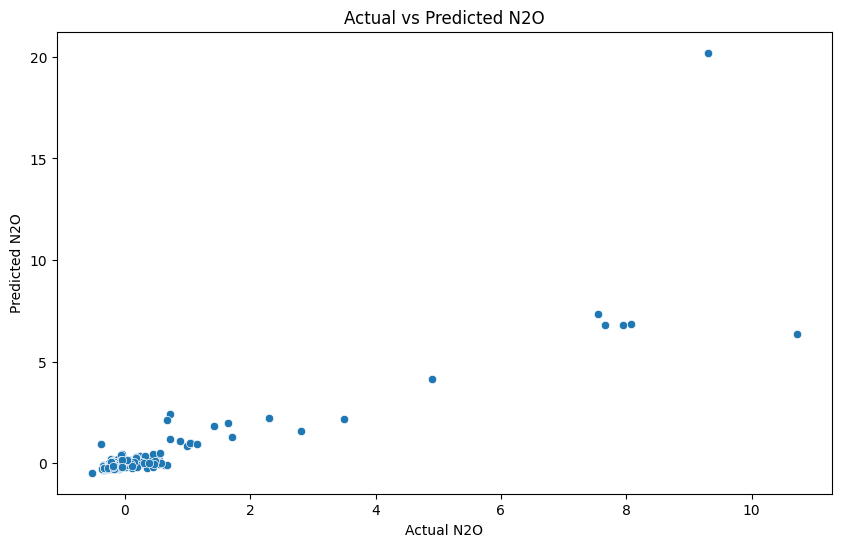

<Figure size 1000x600 with 0 Axes>

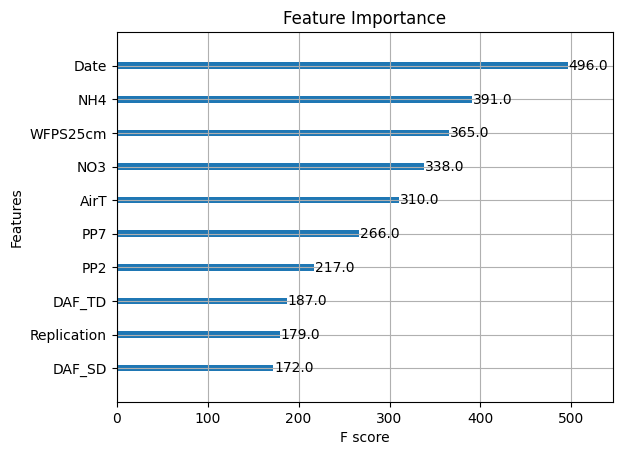

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual N2O')
plt.ylabel('Predicted N2O')
plt.title('Actual vs Predicted N2O')
plt.savefig('01.Dataset-Rofiqul/Visual/AfterRemoveOutliers/001_ActualVsPredictedN2O_WithOutliers.png')
plt.show()

# Plot feature importance
plt.figure(figsize=(10, 6))
xgb.plot_importance(model, max_num_features=10)
plt.savefig('01.Dataset-Rofiqul/Visual/AfterRemoveOutliers/001_FeatureImportance_WithOutliers.png')
plt.title('Feature Importance')
plt.show()

### Outlier Detection with IDO and Combination of Hard Voting and Soft Voting

In [115]:
# Assume that 'N2O' is the target column and other columns are features
features = data.drop(columns=['N2O'])
target = data['N2O']

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

### 2. Detect outliers using Isolation Forest, DBSCAN, and One-Class SVM

In [116]:
# Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
iso_pred = iso_forest.fit_predict(scaled_features)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_pred = dbscan.fit_predict(scaled_features)

# One-Class SVM
ocsvm = OneClassSVM(nu=0.05, kernel="rbf", gamma='auto')
ocsvm_pred = ocsvm.fit_predict(scaled_features)

# Convert DBSCAN and One-Class SVM predictions to the same format as Isolation Forest (-1 for outliers, 1 for inliers)
dbscan_pred = [1 if x != -1 else -1 for x in dbscan_pred]
ocsvm_pred = [1 if x != -1 else -1 for x in ocsvm_pred]

In [117]:
data['IF_Outlier']=iso_pred
data['DBSCAN_Outlier']=dbscan_pred
data['OCSVM_Outlier']=ocsvm_pred

In [118]:
data

,Date,Year,Experiment,DataUse,Replication,Month,Vegetation,VegType,N2O,N_rate,...,NH4,NO3,Clay,Sand,SOM,IF_Outlier,DBSCAN_Outlier,OCSVM_Outlier,Hard_Voting_Outlier,Soft_Vote_Outlier
0,424,0.020682,1,0,0,3,0,0,-0.125408,0.481233,...,-0.031188,-0.083017,-0.904182,0.796768,-0.642242,1,-1,1,1,1
1,360,0.020682,1,0,0,3,0,0,-0.185324,0.481233,...,-0.034134,-0.082259,-0.904182,0.796768,-0.642242,1,-1,1,1,1
2,379,0.020682,1,0,0,3,0,0,-0.137842,0.481233,...,-0.047719,-0.071667,-0.904182,0.796768,-0.642242,1,1,1,1,1
3,382,0.020682,1,0,0,3,0,0,-0.144855,0.481233,...,-0.046323,-0.069647,-0.904182,0.796768,-0.642242,1,1,1,1,1
4,455,0.020682,1,0,0,7,0,0,-0.158726,0.481233,...,-0.095994,-0.031903,-0.904182,0.796768,-0.642242,1,-1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,111,0.297184,2,1,3,10,2,0,-0.204643,-0.926517,...,0.432024,-0.774893,-0.076581,0.132085,-0.084319,1,-1,1,1,1
2242,223,0.297184,2,1,0,9,2,0,-0.227464,-0.926517,...,-0.448672,-0.789985,0.352933,0.126198,-0.357662,1,-1,1,1,1
2243,223,0.297184,2,1,1,9,2,0,-0.269245,-0.926517,...,-0.611951,-0.716945,0.613785,-0.135877,-0.631005,1,-1,1,1,1
2244,223,0.297184,2,1,2,9,2,0,-0.251690,-0.926517,...,-0.601740,-0.668688,0.445122,-0.199876,-0.069133,1,-1,1,1,1


## Combine the results using hard voting and soft voting
### Hard Voting

In [119]:
import numpy as np

# Combine predictions using hard voting
combined_pred_hard = np.array([iso_pred, dbscan_pred, ocsvm_pred]).T
hard_voting_pred = np.apply_along_axis(lambda x: -1 if np.sum(x == -1) > 1 else 1, axis=1, arr=combined_pred_hard)

### Soft Voting

In [120]:
# Combine predictions using soft voting
combined_pred_soft = np.array([iso_forest.decision_function(scaled_features), dbscan_pred, ocsvm.decision_function(scaled_features)]).T
soft_voting_pred = np.apply_along_axis(lambda x: -1 if np.mean(x) < 0 else 1, axis=1, arr=combined_pred_soft)

In [131]:
file_path = '01.Dataset-Rofiqul/BeforeRemoveOutliers/011_N2O_Soft_Voting_agriculture_dataset.csv'
data = pd.read_csv(file_path)

In [132]:
data

,Date,Year,Experiment,DataUse,Replication,Month,Vegetation,VegType,N2O,N_rate,...,NH4,NO3,Clay,Sand,SOM,IF_Outlier,DBSCAN_Outlier,OCSVM_Outlier,Hard_Voting_Outlier,Soft_Vote_Outlier
0,2/9/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.125408,0.481233,...,-0.031188,-0.083017,-0.904182,0.796768,-0.642242,1,0,1,1,1
1,2/10/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.185324,0.481233,...,-0.034134,-0.082259,-0.904182,0.796768,-0.642242,1,0,1,1,1
2,2/18/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.137842,0.481233,...,-0.047719,-0.071667,-0.904182,0.796768,-0.642242,1,0,1,1,1
3,2/19/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.144855,0.481233,...,-0.046323,-0.069647,-0.904182,0.796768,-0.642242,1,0,1,1,1
4,3/16/12,0.020682,BCSE_KBS,Building,R1,March,Corn,Annual,-0.158726,0.481233,...,-0.095994,-0.031903,-0.904182,0.796768,-0.642242,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,10/16/2013,0.297184,MCSE-T2,Testing,R4,October,TRIAE,Annual,-0.204643,-0.926517,...,0.432024,-0.774893,-0.076581,0.132085,-0.084319,1,0,1,1,1
2242,11/15/2013,0.297184,MCSE-T2,Testing,R1,November,TRIAE,Annual,-0.227464,-0.926517,...,-0.448672,-0.789985,0.352933,0.126198,-0.357662,1,0,1,1,1
2243,11/15/2013,0.297184,MCSE-T2,Testing,R2,November,TRIAE,Annual,-0.269245,-0.926517,...,-0.611951,-0.716945,0.613785,-0.135877,-0.631005,1,0,1,1,1
2244,11/15/2013,0.297184,MCSE-T2,Testing,R3,November,TRIAE,Annual,-0.251690,-0.926517,...,-0.601740,-0.668688,0.445122,-0.199876,-0.069133,1,0,1,1,1


In [136]:
# Add the voting results to the original data
data['Hard_Voting_Outlier'] = hard_voting_pred
data['Soft_Voting_Outlier'] = soft_voting_pred

# Count the number of outliers and non-outliers for each voting method
hard_outlier_count = data[data['Hard_Voting_Outlier'] == -1].shape[0]
hard_non_outlier_count = data[data['Hard_Voting_Outlier'] == 1].shape[0]

soft_outlier_count = data[data['Soft_Voting_Outlier'] == -1].shape[0]
soft_non_outlier_count = data[data['Soft_Voting_Outlier'] == 1].shape[0]

print(f"Hard Voting - Number of outliers: {hard_outlier_count}")
print(f"Hard Voting - Number of non-outliers: {hard_non_outlier_count}")

print(f"Soft Voting - Number of outliers: {soft_outlier_count}")
print(f"Soft Voting - Number of non-outliers: {soft_non_outlier_count}")

# Save the data with outlier information to a new CSV file
# data.to_csv('01.Dataset-Rofiqul/BeforeRemoveOutliers/019_data_with_COMBINATION_hard_soft_voting_outliers.csv', index=False)

# Display the counts
print(f"Outliers in 'N2O' with Hard Voting: {hard_outlier_count}")
print(f"Non-Outliers in 'N2O' with Hard Voting: {hard_non_outlier_count}")

print(f"Outliers in 'N2O' with Soft Voting: {soft_outlier_count}")
print(f"Non-Outliers in 'N2O' with Soft Voting: {soft_non_outlier_count}")

Hard Voting - Number of outliers: 165
Hard Voting - Number of non-outliers: 2081
Soft Voting - Number of outliers: 734
Soft Voting - Number of non-outliers: 1512
Outliers in 'N2O' with Hard Voting: 165
Non-Outliers in 'N2O' with Hard Voting: 2081
Outliers in 'N2O' with Soft Voting: 734
Non-Outliers in 'N2O' with Soft Voting: 1512


In [143]:
# Summary of outliers detection
outlier_summary = {
    'Method': ['Isolation Forest', 'DBSCAN', 'One-Class SVM', 'Hard Voting', 'Soft Voting'],
    'Outliers': [
        np.sum(data['IF_Outlier'] == -1),
        np.sum(data['DBSCAN_Outlier'] == -1),
        np.sum(data['OCSVM_Outlier'] == -1),
        hard_outlier_count,
        soft_outlier_count
    ],
    'Non-Outliers': [
        np.sum(data['IF_Outlier'] == 1),
        np.sum(data['DBSCAN_Outlier'] != -1),
        np.sum(data['OCSVM_Outlier'] == 1),
        hard_non_outlier_count,
        soft_non_outlier_count
    ]
}

In [146]:
summary_df = pd.DataFrame(outlier_summary)
# Save the summary to a CSV file
summary_df.to_csv('01.Dataset-Rofiqul/BeforeRemoveOutliers/015_outlier_voting_summary.csv', index=False)
print(summary_df)

             Method  Outliers  Non-Outliers
0  Isolation Forest       113          2133
1            DBSCAN        10          2236
2     One-Class SVM       112          2134
3       Hard Voting       165          2081
4       Soft Voting       734          1512


/tmp/ipykernel_1925/1055538334.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Method', y='Outliers', data=summary_df, palette="Set3")
/tmp/ipykernel_1925/1055538334.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Method', y='Non-Outliers', data=summary_df, palette="Set3")


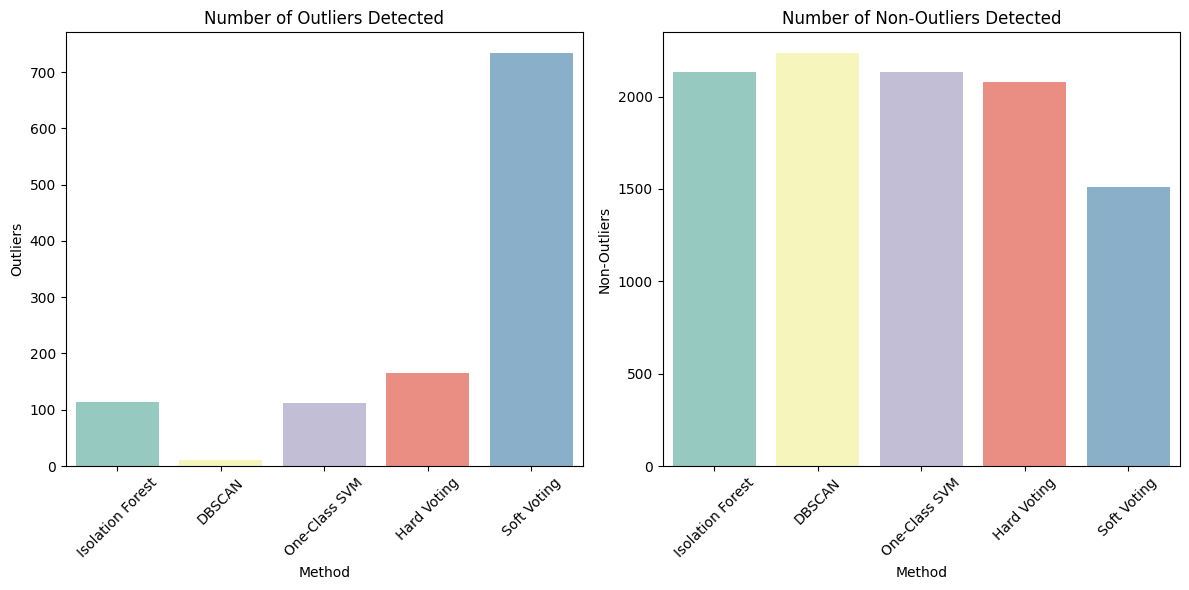

In [148]:
# Visualization of summary outlier and voting
plt.figure(figsize=(12, 6))

# Plot for Outliers
plt.subplot(1, 2, 1)
sns.barplot(x='Method', y='Outliers', data=summary_df, palette="Set3")
plt.title('Number of Outliers Detected')
plt.xticks(rotation=45)

# Plot for Non-Outliers
plt.subplot(1, 2, 2)
sns.barplot(x='Method', y='Non-Outliers', data=summary_df, palette="Set3")
plt.title('Number of Non-Outliers Detected')
plt.xticks(rotation=45)
# plt.savefig('01.Dataset-Rofiqul/Visual/BeforeRemoveOutliers/001_OutlierDetectedHardSoftVoting.png')
plt.tight_layout()
plt.show()